<a href="https://colab.research.google.com/github/sanhiitaa/fastag-fraud-detection-classification/blob/main/fast_tag_fraud_detection_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('/content/drive/MyDrive/datasets/FastagFraudDetection.csv')
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [11]:
df.shape

(5000, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [13]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [15]:
for cols in df.columns:
  print(f'{cols} - {df[cols].nunique()}\n-------------')

Transaction_ID - 5000
-------------
Timestamp - 4423
-------------
Vehicle_Type - 7
-------------
FastagID - 4451
-------------
TollBoothID - 6
-------------
Lane_Type - 2
-------------
Vehicle_Dimensions - 3
-------------
Transaction_Amount - 20
-------------
Amount_paid - 23
-------------
Geographical_Location - 5
-------------
Vehicle_Speed - 85
-------------
Vehicle_Plate_Number - 5000
-------------
Fraud_indicator - 2
-------------


In [ ]:
cols_to_drop= ['Transaction_ID', 'FastagID', 'Vehicle_Plate_Number']

In [17]:
df.sample(10)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
3602,3603,7/12/2023 1:36,Truck,FTG-956-LMK-432,C-103,Express,Large,340,340,"12.84197701525119, 77.67547528176169",58,MH23EP2345,Not Fraud
3540,3541,9/13/2023 15:36,Van,FTG-894-KJH-098,B-102,Express,Medium,130,100,"12.84197701525119, 77.67547528176169",66,KA78OP1234,Fraud
4044,4045,11/6/2023 8:02,Van,FTG-034-RFV-876,B-102,Express,Medium,120,120,"12.936687032945434, 77.53113977439017",65,KA01NO8901,Not Fraud
260,261,3/1/2023 9:50,Car,FTG-261-POU-918,A-101,Express,Small,120,120,"13.059816123454882, 77.77068662374292",53,KA70EF0223,Not Fraud
2842,2843,10/20/2023 12:13,SUV,FTG-343-QUE-321,B-102,Express,Large,180,180,"13.059816123454882, 77.77068662374292",50,KA71DE2345,Not Fraud
2448,2449,6/27/2023 16:30,Sedan,FTG-408-UVW-876,A-101,Express,Medium,115,115,"13.21331620748757, 77.55413526894684",69,MH39CD5678,Not Fraud
4761,4762,1/22/2023 12:44,Bus,FTG-221-BVC-987,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",93,TN78OP2345,Not Fraud
4577,4578,6/30/2023 2:33,Sedan,FTG-037-NGI-987,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",78,BR45CD4567,Not Fraud
300,301,4/10/2023 11:10,SUV,FTG-210-TYU-230,B-102,Express,Large,180,180,"13.059816123454882, 77.77068662374292",46,KA29QR2245,Not Fraud
4150,4151,9/1/2023 12:30,Sedan,FTG-140-POU-220,A-101,Express,Medium,110,70,"12.936687032945434, 77.53113977439017",75,DL56IJ4567,Fraud




1.   extract state code from vehichle plate number
2.   try making a new feature using the transaction amount and amount paid
3.   split time - extract month, and time of day into two new columns



In [8]:
df['Geographical_Location'].value_counts()

Geographical_Location
13.059816123454882, 77.77068662374292    1000
13.042660878688794, 77.47580097259879    1000
12.84197701525119, 77.67547528176169     1000
12.936687032945434, 77.53113977439017    1000
13.21331620748757, 77.55413526894684     1000
Name: count, dtype: int64

<Axes: >

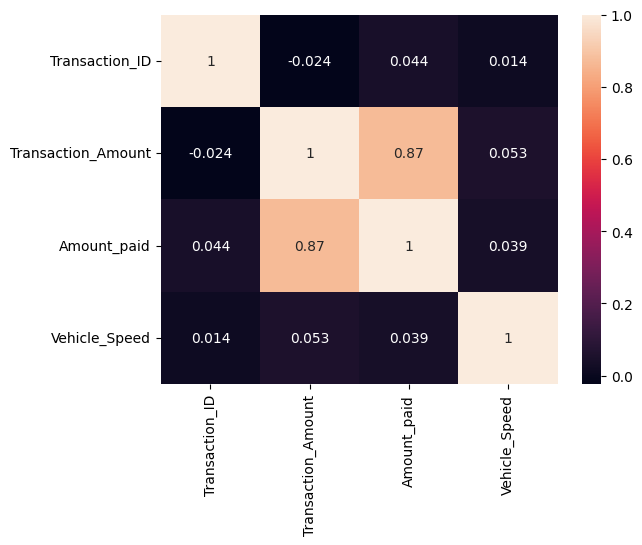

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

FastagID
FTG-001-ABC-121    1
FTG-524-CDE-098    1
FTG-531-ZAS-987    1
FTG-530-LPO-210    1
FTG-528-WSX-876    1
                  ..
FTG-414-HIJ-567    1
FTG-647-KLM-890    1
FTG-880-NOP-123    1
FTG-113-QRS-456    1
FTG-459-WSX-543    1
Name: count, Length: 4451, dtype: int64

In [20]:
df['Timestamp'].plot()

TypeError: no numeric data to plot